In [9]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# imports
from utils import *
from models import *

In [3]:
loaded_train = load_pickle("../dataframes/app_train_preprocessed.pickle")
loaded_test = load_pickle("../dataframes/app_test_preprocessed.pickle")

train_Y = loaded_train['TARGET'].values
loaded_train.drop(columns=['TARGET', 'SK_ID_CURR'], inplace=True)
loaded_test.drop(columns=['SK_ID_CURR'], inplace=True)

# convert from dataframes to arrays
train_X = loaded_train.values
test_X = loaded_test.values

Text(0, 0.5, 'Count')

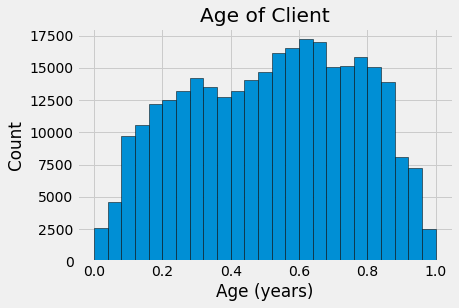

In [21]:
plt.style.use('fivethirtyeight')

# print(loaded_train['DAYS_BIRTH'])

plt.hist(loaded_train['DAYS_BIRTH'], edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [26]:
app_train = load_app_training_data()
app_test = load_test_data()

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


Text(0, 0.5, 'Count')

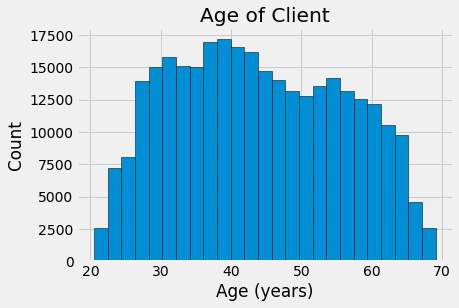

In [27]:
plt.style.use('fivethirtyeight')

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# print(app_train['DAYS_BIRTH'])

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [31]:
# do basic pre-processing
def pre_process(train_data, test_data):
#     train_data, test_data = encode_binary_cols(train_data, test_data) # purposefully left out - was taking too long
    train_data, test_data = one_hot_encode(train_data, test_data)
    train_data, test_data = align_data(train_data, test_data)
    train_data, test_data = remove_days_employed_anomaly(train_data, test_data)
    
    train_data, test_data = remove_missing_cols(train_data, test_data, thr=0.90)
    
    train_data, test_data = mean_imputation(train_data, test_data)

    return train_data, test_data

train_data, test_data = pre_process(app_train.copy(), app_test.copy())

AFTER ONE HOT ENCODING
Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)
AFTER ALIGNMENT:
Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)
Test data contain 9274 anomalies out of 48744 rows
Removing columns with 0.9 proportion of missing values
AFTER REMOVING MISSING COLS (and aligning):
Training Features shape:  (307511, 244)
Testing Features shape:  (48744, 243)


ValueError: X has 243 features per sample, expected 244